<a href="https://colab.research.google.com/github/nouha18/pythoncheckpoint/blob/update/Logistic_Regression_python_sklearn_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
Afin de mieux étudier cette parte de la Supervised Learning, nous avons besoins d'une dataset préparé après le data-preprocessing alors pour ce faire j'ai préparé une partie code pour le téléchargement du dataset à partir de 
**Google drive**.
Bonne Lecture à tous.

In [23]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#https://drive.google.com/file/d/1VV0wXaK5bDSRBZyaQlcCOx4T90iweCMk/view?usp=sharing
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1VV0wXaK5bDSRBZyaQlcCOx4T90iweCMk'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William H

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pand
import numpy as np

df= pand.read_csv('titanicset.csv')
df.drop('Cabin',
  axis='columns', inplace=True)



In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [26]:
df.columns = df.columns.str.replace(' ', '')

In [27]:
df.sum().isnull()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
dtype: bool

In [28]:
df['Survived'].astype(np.float32)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

x =df[["Pclass","Fare"]].values
y=df["Survived"].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=60) 
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.65


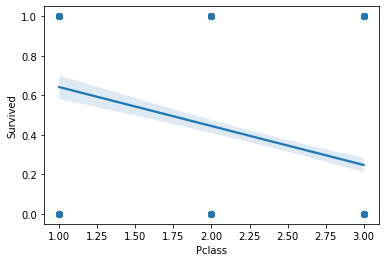

In [35]:
sns.regplot(x='Pclass',y='Survived',scatter="true",data=df)

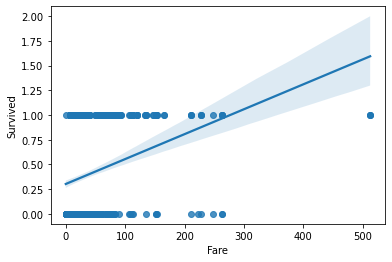

In [37]:
sns.regplot(x='Fare',y='Survived',data=df)

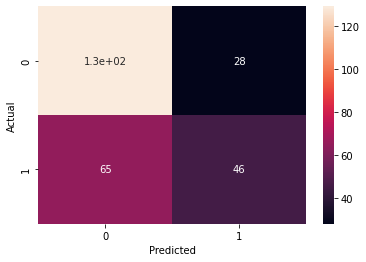

In [38]:
confusion_matrix = pand.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Matrix description :** noting that 15*100 of predicted TP means survived people, and 100 is False Negative means dead and predicted survived.
Otherwise, only 9 predicted values are False Positive which means they are pretended dead but they survived.
Finally only 10 are True Négative that means 10 are predicted dead and they are really dead. 

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.74       157
           1       0.62      0.41      0.50       111

    accuracy                           0.65       268
   macro avg       0.64      0.62      0.62       268
weighted avg       0.65      0.65      0.64       268



For the first **recall** result we got 94% correct prediction and only 9% are false.
Not so bad because we have 59% of **precision** for "0" and 53% for "1" output.


# AUC/ROC Matrix

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
print(confusion_matrix(y_test,y_pred))


[[129  28]
 [ 65  46]]


In [41]:
print(roc_auc_score(y_test,y_pred))


0.6180352326849142


AUC Score: 0.71


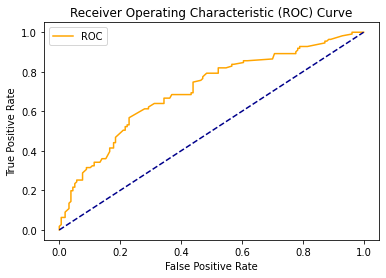

In [42]:
from sklearn import metrics
pred_prob = logreg.predict_proba(x_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**=> Noting** that the ***AUC Score *** is 0.71 means that Pclass and Fare Features can be considered as parameters to measure performance of 71% of performance that lead to best **measure of separability** between classes.